## classification of melignant and belign skin lesions

This model will be able to tell whether a skin lesion is melignant or belign (cancerous or non-cancerous). there are 9 different types of skin lesions in this model. 2 of those classes are Malignant (cancerous). My final model will aim to have a high accuracy rate and the model will be used in a web app to make a 'guessing game'; whereby users will be Versing the 'Computer', trying to guess whether an image is malignant or benign, the app will keep track of how many the AI gets correct and will compare with the users results.

currently the model is succesfully training, however there needs to be improvements on the hyper parameters in order to improve learning and overeall accuracy of the model.

this is contrary to what I had initially specified in my project specification, whereby users would upload an image to which then the model would try to classify the image to any of the 9 classifications. However, instead I will change this slightly.
- the model would still classify the skin lesion images into 9 different classifications of skin cancer/ skin conditions

- the model will be deployed in a web application or website. Whereby a random image will show and the user has to select an option on whether it is benign or malignant. Score will be accumulated and the human score will be compared to the ai score.

Benign refers to a condition, tumor, or growth that is not cancerous. This means that it does not spread to other parts of the body. It does not invade nearby tissue. Sometimes, a condition is called benign to suggest it is not dangerous or serious

Malignant tumors are cancerous. They develop when cells grow uncontrollably. If the cells continue to grow and spread, the disease can become life threatening. Malignant tumors can grow quickly and spread to other parts of the body in a process called metastasis.

as there are 9 different classifications, the baseline can be determined to be 1/9.

### importing necessary libraries

##### please run every cell of code following

numpy is good for numerical arrays

matplotlib will be required to render charts and plots of the data i will be using

tensorflow will be used for the machine learning model, but I will be using keras api as tensorflow is quite complex

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers, losses
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy import asarray

image data generator will make working with the images easier

### Loading the data

In [3]:
!pip install opendatasets

In [13]:
import opendatasets as od

In [20]:
od.download('https://www.kaggle.com/nodoubttome/skin-cancer9-classesisic') 
force=True

Skipping, found downloaded files in ".\skin-cancer9-classesisic" (use force=True to force download)


I will be using "Skin Cancer ISIC" dataset from kaggle. This dataset contains a balanced dataset of images of benign skin moles and malignant skin moles classified into 9 labeled classes. https://www.kaggle.com/nodoubttome/skin-cancer9-classesisic

the data is divided, the directories are already pre labeled into 9 different classes.

hence, the training and test data is labeled accordingly:

benign skin lesions:
- actinic keratosis
- pigmented benign keratosis
- dermatofibroma
- nevus
- sebhorrheic keratosis
- squamous cell carcinoma
- vascular lesion

malignant skin lesions:
- basal cell carcinoma
- melanoma

this will retrieve data from the correct path in the file

In [2]:
PATH = '../Binary classification of skin cancer/data 9 class/'

train_file = os.path.join(PATH, 'Train')
test_file = os.path.join(PATH, 'Test')


##### training data

In [3]:
train_actinic_file = os.path.join(train_file, 'actinic keratosis')
train_basal_file = os.path.join(train_file, 'basal cell carcinoma')
train_dermato_file = os.path.join(train_file, 'dermatofibroma')
train_melanoma_file = os.path.join(train_file, 'melanoma')
train_nevus_file = os.path.join(train_file, 'nevus')
train_pigment_file = os.path.join(train_file, 'pigmented benign keratosis')
train_seborr_file = os.path.join(train_file, 'seborrheic keratosis')
train_squamous_file = os.path.join(train_file, 'squamous cell carcinoma')
train_vascular_file = os.path.join(train_file, 'vascular lesion')

###### test data

In [4]:
test_actinic_file = os.path.join(test_file, 'actinic keratosis')
test_basal_file = os.path.join(test_file, 'basal cell carcinoma')
test_dermato_file = os.path.join(test_file, 'dermatofibroma')
test_melanoma_file = os.path.join(test_file, 'melanoma')
test_nevus_file = os.path.join(test_file, 'nevus')
test_pigment_file = os.path.join(test_file, 'pigmented benign keratosis')
test_seborr_file = os.path.join(test_file, 'seborrheic keratosis')
test_squamous_file = os.path.join(test_file, 'squamous cell carcinoma')
test_vascular_file = os.path.join(test_file, 'vascular lesion')

ImageDataGenerator generates batches of tensor image data with real-time data augmentation

all the data will generalise into 224 by 224 image sizes

rescaling the images will squish the images to a value of 0 to 1

In [5]:
train_img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data_generator = train_img_gen.flow_from_directory(batch_size=128,
                                                           directory=train_file,
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='categorical')

test_data_generator = test_img_gen.flow_from_directory(batch_size=128,
                                                         directory=test_file,
                                                         target_size=(224, 224),
                                                         class_mode='categorical')

validation_generator = train_img_gen.flow_from_directory(directory=train_file,
                                                         batch_size=128,
                                                         shuffle=False,
                                                          target_size=(224, 224),
                                                        class_mode='categorical',
                                                         subset='validation'
                                                        )


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


### Data visualisation

In [6]:
train_data_generator.image_shape

(224, 224, 3)

In [87]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 3, figsize=(50, 50))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    
    plt.tight_layout()
    plt.show()

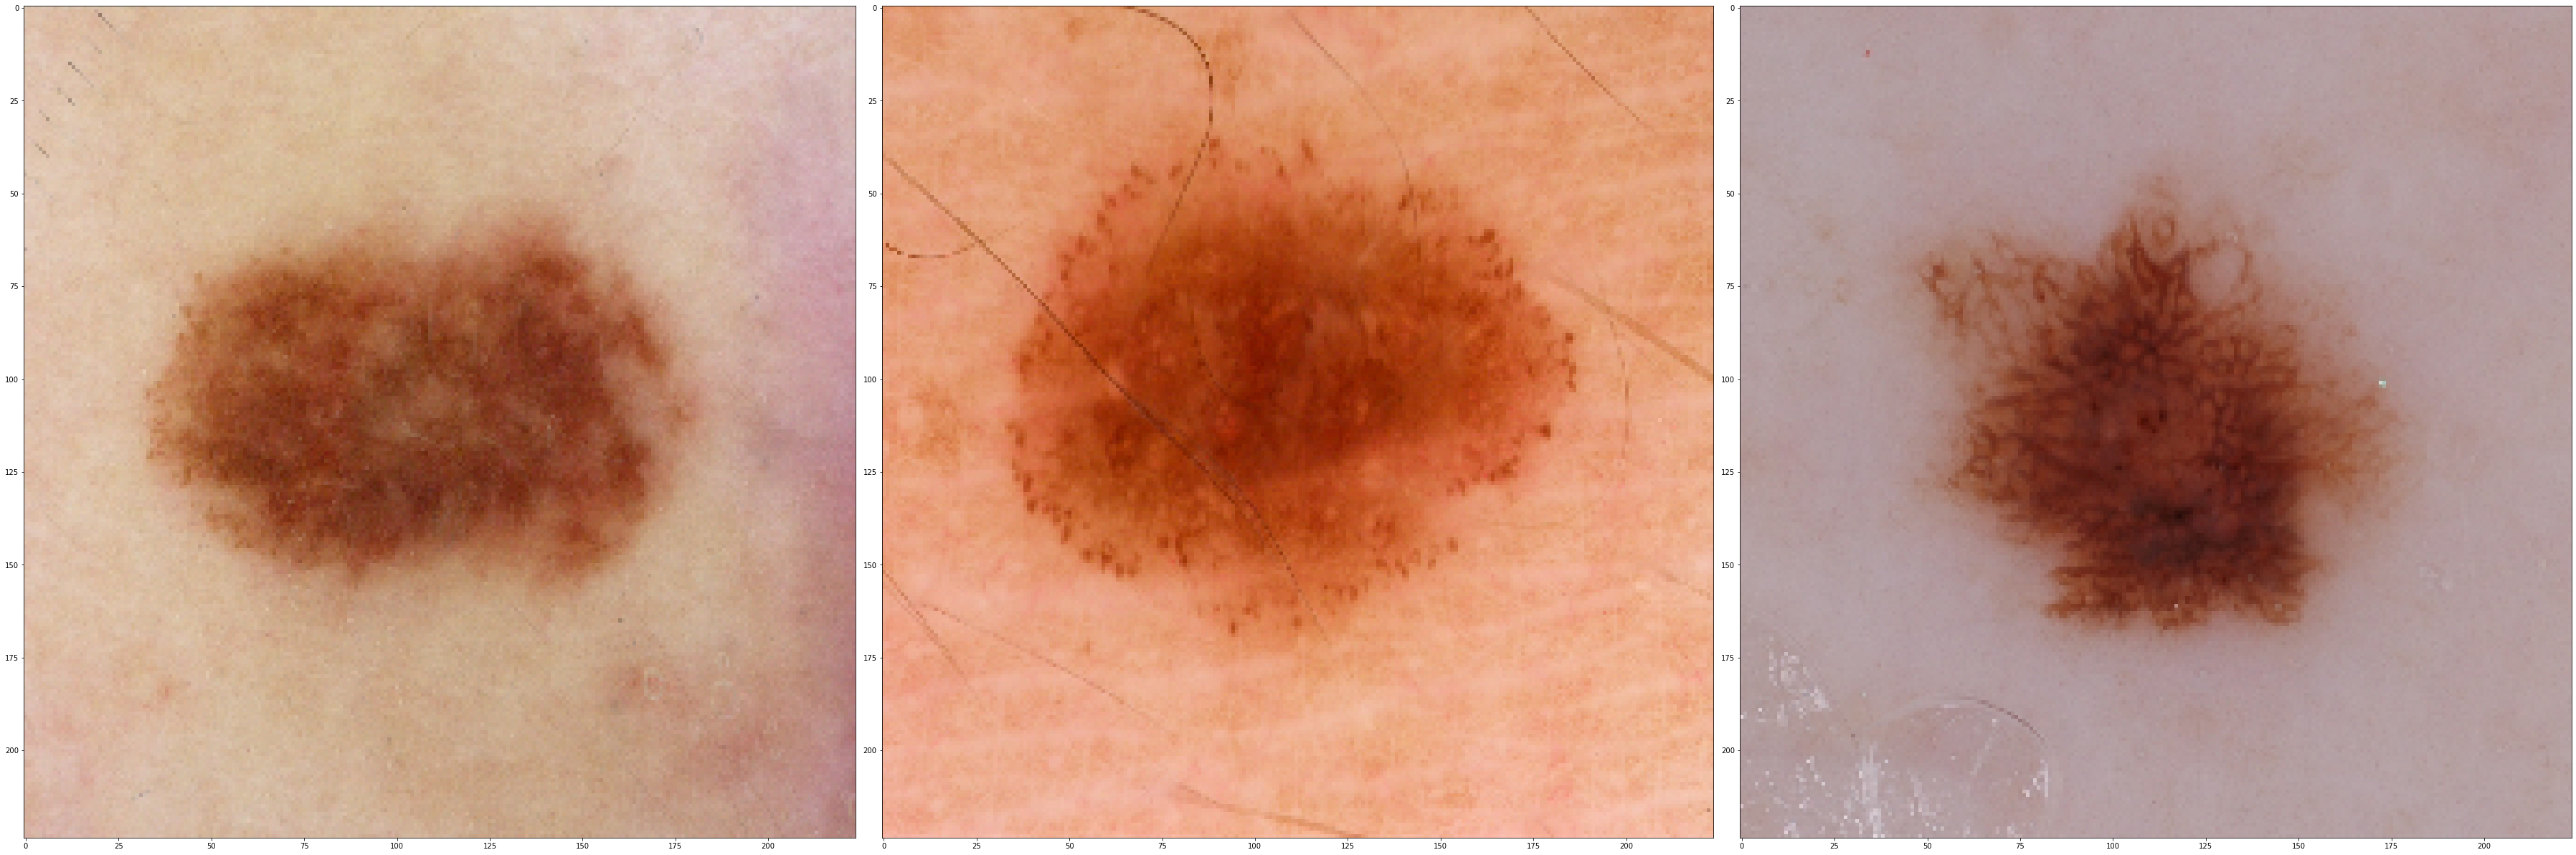

In [10]:
sample_training_images, _ = next(train_data_generator)

plot_images(sample_training_images[:3])

## Machine learning model using Keras

### 1st Model

As I will be using images, I will be using convolusional layers. This abstracts the image and make the image independant of its positioning.

In [50]:
# #sequential class takes array of layers as an argument

# model = Sequential([

#     layers.Conv2D(4, 3, activation='relu', input_shape=(224,224,3)),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dense(4, activation='relu'),
#     layers.Dense(100, activation='relu'),
#     layers.Dropout(0.6),
    
#     layers.Dense(9, activation='softmax')
# ])

model = Sequential([

    layers.Conv2D(4, 3, activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(4, 3, activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(4, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.6),
    
    layers.Dense(9, activation='softmax')
])

In [51]:
 model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(
        train_data_generator,
        batch_size =128,
        epochs=10,
        steps_per_epoch=train_data_generator.samples // 128,
        validation_data=validation_generator,
        validation_steps=100,
#         callbacks=[save]
    )

Epoch 1/10
17/17 [==============================] - 55s 3s/step - loss: 2.3712 - accuracy: 0.1729 - val_loss: 2.1658 - val_accuracy: 0.2635
Epoch 2/10
17/17 [==============================] - 44s 3s/step - loss: 2.1408 - accuracy: 0.1866
Epoch 3/10
17/17 [==============================] - 47s 3s/step - loss: 2.1020 - accuracy: 0.1792
Epoch 4/10
17/17 [==============================] - 47s 3s/step - loss: 2.0761 - accuracy: 0.1895
Epoch 5/10
17/17 [==============================] - 50s 3s/step - loss: 2.0673 - accuracy: 0.1904
Epoch 6/10
17/17 [==============================] - 49s 3s/step - loss: 2.0564 - accuracy: 0.1971
Epoch 7/10
17/17 [==============================] - 49s 3s/step - loss: 2.0437 - accuracy: 0.2151
Epoch 8/10
17/17 [==============================] - 49s 3s/step - loss: 2.0456 - accuracy: 0.1994
Epoch 9/10
17/17 [==============================] - 48s 3s/step - loss: 2.0355 - accuracy: 0.1862
Epoch 10/10
17/17 [==============================] - 48s 3s/step - loss: 2.0

|Number of epochs | Validation accuracy | Validation loss | Training accuracy | Training loss |filter 1 | filter 2 | dropout | learning rate | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 10 | N/A | N/A | 0.1900 | 2.0243 | 4 | 4 | 0.6 | 0.001 |

|user | comments |
| --- | --- | 
| 1 | The simplicity is attractive, design is not complex |
| 2 | I enjoy how there is added information, making it informative | 
| 3 | I would see this as something that is more targeted towards the medical field |

In [126]:
def baseline_model():
    # the first hyperparameter is the hidden units or the number of neurons 
    #the second one is the kernelvalue, this looks at subsection of an image and does matrix multiplication 
    #the activation function will be relu and sigmoid
    #input_shape is the input shape of the data I will be using, in this case 224x224
    #the images are 2 dimensional
    import numpy as np
    import matplotlib.pyplot as plt
    from tensorflow.keras import layers
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.models import Sequential
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D
    from tensorflow.keras import layers, losses
    from tqdm import tqdm
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from PIL import Image
    from numpy import asarray
    from tensorflow.keras import layers
    from tensorflow.keras import models
    
    model = models.Sequential()
    model.add(layers.Conv2D(4, 3, activation='relu', input_shape=(224,224,3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(4, 3, activation='relu', input_shape=(224,224,3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    from tensorflow.keras import optimizers

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [115]:
total_train_size = len(os.listdir(train_actinic_file)) + len(os.listdir(train_basal_file)) + len(os.listdir(train_dermato_file)) + len(os.listdir(train_melanoma_file)) + len(os.listdir(train_nevus_file)) + len(os.listdir(train_pigment_file)) + len(os.listdir(train_seborr_file)) + len(os.listdir(train_squamous_file)) + len(os.listdir(train_vascular_file))
                    
total_test_size = len(os.listdir(test_actinic_file)) + len(os.listdir(test_basal_file)) + len(os.listdir(test_dermato_file)) + len(os.listdir(test_melanoma_file)) +len(os.listdir(test_nevus_file)) + len(os.listdir(test_pigment_file)) + len(os.listdir(test_seborr_file)) + len(os.listdir(test_squamous_file)) + len(os.listdir(test_vascular_file))

In [116]:
def train_model(model, num_epochs):
    from keras.callbacks import ModelCheckpoint
    save = ModelCheckpoint(filepath='best.model.h5',verbose = 1, save_best_only=True)
    
    
    return model.fit(
        train_data_generator,
        batch_size =128,
        epochs=num_epochs,
        steps_per_epoch=train_data_generator.samples // 128,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[save]
    )




### Analysing loss and accuracy

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
history_dict['loss']

[2.1381983757019043,
 2.112699031829834,
 2.092298984527588,
 2.072619915008545,
 2.057633876800537,
 2.0480644702911377,
 2.038886308670044,
 2.028874635696411,
 2.0342071056365967,
 2.0229687690734863]

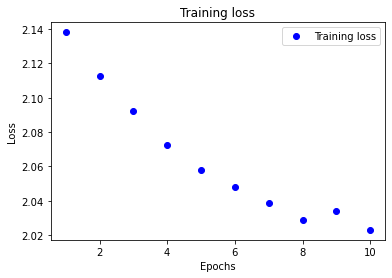

In [47]:
loss = history_dict['loss']


epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
history_dict['accuracy']

[0.1842728555202484,
 0.19137848913669586,
 0.1923259049654007,
 0.2008526772260666,
 0.20180009305477142,
 0.201326385140419,
 0.2041686475276947,
 0.1980104148387909,
 0.20180009305477142,
 0.19990526139736176]

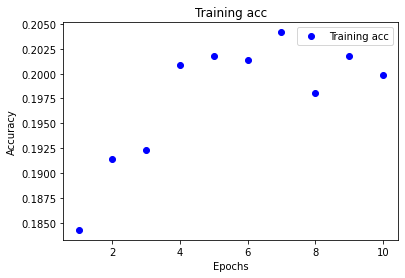

In [49]:
plt.clf()

acc = history_dict['accuracy']    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Overall evaluation

currently the training model is working successfully, and is greater than the baseline (0.11). However, the model can definitely be improved, with improvements and changes to the hyperparameters. Also, the model will require a refinement in procedure. What i mean by this is that currently the data is not being passed as a numpy array however I will change the model and form it as a numpy array.